# # Bay Area Bike Share Analysis
Tài liệu này có 2 phiên bản: Tiếng Việt và Tiếng Anh

| Để hiểu kĩ hơn: Tôi có phiên bản trực quan hoá dữ liệu xây dựng bằng Tableau: https://public.tableau.com/app/profile/tai.le.quang/viz/BayAreaBikeSharing/BussinesStory?publish=yes
> ***[Bay Area Bike Share](http://www.bayareabikeshare.com/) là công ty cung cấp dịch vụ cho thuê xe đạp theo yêu cầu cho khách hàng ở San Francisco, Redwood City, Palo Alto, Mountain View và San Jose . Người dùng có thể mở khóa xe đạp từ nhiều trạm khác nhau trên khắp mỗi thành phố và trả chúng về bất kỳ trạm nào trong cùng thành phố. Người dùng trả tiền cho dịch vụ thông qua đăng ký hàng năm hoặc bằng cách mua vé 3 ngày hoặc 24 giờ. Người dùng có thể thực hiện số chuyến đi không giới hạn, với những chuyến đi có độ dài dưới ba mươi phút mà không phải trả thêm phí; các chuyến đi dài hơn sẽ phải chịu phí ngoài giờ.***
>

Tài liệu này sẽ hướng dẫn bạn thực hiện phân tích thăm dò về hệ thống Chia sẻ Xe đạp Vùng Vịnh. Bạn sẽ tìm hiểu về hai giai đoạn chính của phân tích dữ liệu: sắp xếp dữ liệu và phân tích dữ liệu khám phá. Trước khi đi sâu vào dữ liệu, điều quan trọng là phải xem xét các câu hỏi bạn muốn trả lời về dịch vụ chia sẻ xe đạp. Ví dụ: nếu bạn đang làm việc cho Bay Area Bike Share, bạn cần loại thông tin nào để đưa ra quyết định kinh doanh sáng suốt? Ngoài ra, nếu bạn là người sử dụng dịch vụ chia sẻ xe đạp, những yếu tố nào sẽ ảnh hưởng đến cách bạn sử dụng dịch vụ? Trả lời những câu hỏi này sẽ giúp bạn tiếp cận quá trình phân tích dữ liệu với mục tiêu rõ ràng.

Trong đồ án này, chúng tôi chủ yếu nghiên cứu tìm hiểu các vấn đề chính:

- Vấn đề 1: Tìm hiểu ***Loại đăng ký*** nào được nhiều người sử dụng dịch vụ của chúng tôi nhất.
- Vấn đề 2: Thăm dò, thống kê thời lượng chuyến đi.
- Vấn đề 3: Phân tích ***Loại thuê bao các ngày trong tuần***
- Vấn đề 4: Vẽ đồ thị mô tả xu hướng lượng khách du lịch qua các ngày trong tuần. Ngày nào chúng ta có nhiều khách nhất?

# Mô tả dữ liệu

> *Vào năm 2014, Bay Area Bike Share đã tổ chức [Thử thách dữ liệu mở](http://www.bayareabikeshare.com/datachallenge-2014) để khuyến khích các nhà phân tích dữ liệu tạo trực quan hóa dựa trên tập dữ liệu mở của họ. Bạn sẽ tạo hình ảnh trực quan của riêng mình trong dự án này, nhưng trước tiên, hãy xem qua [người chiến thắng bài gửi cho Phân tích xuất sắc nhất](http://thfield.github.io/babs/index.html) từ Tyler Field.*
>

## Thông tin dữ liệu

Chúng tôi đã có 2 tệp csv trong

- trạm_data.csv
     - station_id: số ID trạm (tương ứng với "station_id" trong "201402_status_data.csv")
     - name: tên trạm
     - lat: vĩ độ
     - long: kinh độ
     - dockcount: tổng số bến cảng tại ga
     - mốc: thành phố (San Francisco, Redwood City, Palo Alto, Mountain View, San Jose)
     - cài đặt: ngày trạm đó được cài đặt
- trip_data.csv
     - Trip ID: ID số của chuyến đi xe đạp
     - Duration: thời gian của chuyến đi tính bằng giây
     - Ngày bắt đầu: ngày bắt đầu chuyến đi với ngày và giờ, theo PST
     - Start Station: tên trạm của trạm khởi động
     - Start Terminal: tham chiếu số cho trạm khởi động
     - Ngày kết thúc: ngày kết thúc chuyến đi với ngày và giờ, theo PST
     - End Station: tên trạm cho trạm cuối
     - End Terminal: tham chiếu số cho trạm cuối
     - Bike #: ID xe đã sử dụng
     - Loại đăng ký: Thuê bao = thành viên thường niên; Khách hàng = thành viên 24 giờ hoặc 3 ngày
     - Zip Code: Mã zip nhà của người dùng (chỉ áp dụng cho thành viên theo năm)

# Data Wrangling

Bây giờ là lúc để khám phá dữ liệu. Dữ liệu Năm 1 và Năm 2 từ trang [Dữ liệu mở](http://www.bayareabikeshare.com/open-data) của Bay Area Bike Share đã được cung cấp cùng với dự án
nguyên vật liệu; bạn không cần phải tải thêm bất cứ thứ gì.

Khi xử lý một lượng lớn dữ liệu, có thể hữu ích nếu bắt đầu bằng cách làm việc với một mẫu dữ liệu. Điều này giúp dễ dàng xác minh rằng các bước sắp xếp dữ liệu của chúng tôi đang hoạt động bình thường vì mã của chúng tôi sẽ mất ít thời gian hơn để thực thi. Khi chúng tôi tự tin vào cách tiếp cận của mình, chúng tôi có thể mở rộng quy mô để làm việc trên toàn bộ tập dữ liệu.

Để bắt đầu phân tích, hãy bắt đầu bằng cách chạy ô mã đầu tiên để tải tất cả các gói và chức năng cần thiết. Sau đó, thực thi ô mã thứ hai để đọc tập hợp con của tệp dữ liệu chuyến đi đầu tiên. Điều này sẽ tạo một tệp mới chỉ chứa tập hợp con dữ liệu mà chúng tôi quan tâm ban đầu.

In [1]:
# import the necessary library
import csv
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# define 2 variable to save the path file
station_data = 'Database/station_data.csv'
trip_data = 'Database/trip_data.csv'

## Khám phá station_data

In [3]:
station = pd.read_csv(station_data)
station.head()

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [4]:
station.tail()

,station_id,name,lat,long,dockcount,landmark,installation
64,76,Market at 4th,37.786305,-122.404966,19,San Francisco,8/25/2013
65,77,Market at Sansome,37.789625,-122.400811,27,San Francisco,8/25/2013
66,80,San Jose Government Center,37.352601,-121.905733,15,San Jose,12/31/2013
67,82,Broadway St at Battery St,37.798541,-122.400862,15,San Francisco,1/22/2014
68,83,Mezes Park,37.491269,-122.236234,15,Redwood City,2/20/2014


In [5]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station_id    69 non-null     int64  
 1   name          69 non-null     object 
 2   lat           69 non-null     float64
 3   long          69 non-null     float64
 4   dockcount     69 non-null     int64  
 5   landmark      69 non-null     object 
 6   installation  69 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 3.9+ KB


In [6]:
station.nunique()

station_id      69
name            69
lat             68
long            69
dockcount        6
landmark         5
installation    16
dtype: int64

In [7]:
station.isnull().sum()

station_id      0
name            0
lat             0
long            0
dockcount       0
landmark        0
installation    0
dtype: int64

In [8]:
station.describe()

,station_id,lat,long,dockcount
count,69.000000,69.000000,69.000000,69.000000
mean,42.405797,37.593840,-122.223453,17.695652
std,23.822455,0.202682,0.207269,4.026765
min,2.000000,37.329732,-122.418954,11.000000
25%,24.000000,37.390277,-122.400811,15.000000
50%,42.000000,37.771058,-122.388013,15.000000
75%,63.000000,37.788446,-122.081896,19.000000
max,83.000000,37.804770,-121.877349,27.000000


## Khám phá trip_data

In [9]:
trip = pd.read_csv(trip_data)
trip.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [10]:
trip.tail()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
144010,198771,385,2/28/2014 22:15,Powell Street BART,39,2/28/2014 22:22,South Van Ness at Market,66,483,Subscriber,94404
144011,198772,145,2/28/2014 22:38,Commercial at Montgomery,45,2/28/2014 22:40,Davis at Jackson,42,425,Subscriber,94111
144012,198773,677,2/28/2014 22:45,Embarcadero at Sansome,60,2/28/2014 22:56,Market at 4th,76,438,Subscriber,94102
144013,198774,64128,2/28/2014 23:01,Civic Center BART (7th at Market),72,3/1/2014 16:50,Harry Bridges Plaza (Ferry Building),50,414,Customer,94124
144014,198775,570,2/28/2014 23:20,2nd at South Park,64,2/28/2014 23:30,Townsend at 7th,65,577,Subscriber,94107


In [11]:
trip.isnull().sum()

Trip ID                 0
Duration                0
Start Date              0
Start Station           0
Start Terminal          0
End Date                0
End Station             0
End Terminal            0
Bike #                  0
Subscription Type       0
Zip Code             6130
dtype: int64

In [12]:
trip.nunique()

Trip ID              144015
Duration               7983
Start Date            86444
Start Station            69
Start Terminal           69
End Date              85240
End Station              69
End Terminal             69
Bike #                  689
Subscription Type         2
Zip Code               2880
dtype: int64

In [13]:
trip.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144015 entries, 0 to 144014
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Trip ID            144015 non-null  int64 
 1   Duration           144015 non-null  int64 
 2   Start Date         144015 non-null  object
 3   Start Station      144015 non-null  object
 4   Start Terminal     144015 non-null  int64 
 5   End Date           144015 non-null  object
 6   End Station        144015 non-null  object
 7   End Terminal       144015 non-null  int64 
 8   Bike #             144015 non-null  int64 
 9   Subscription Type  144015 non-null  object
 10  Zip Code           137885 non-null  object
dtypes: int64(5), object(6)
memory usage: 12.1+ MB


## Tóm tắt dữ liệu

Chúng tôi gặp phải vấn đề trong đó dữ liệu chứa trong hai tệp có nhiều trường mà chúng tôi không cần sử dụng. Vấn đề này đang gây khó khăn trong việc phân tích dữ liệu. Vì vậy, chúng tôi yêu cầu một tệp tóm tắt sẽ loại bỏ các cột không cần thiết.

Để đơn giản hóa quá trình xử lý một vấn đề nhất định, tôi đã chủ động tạo một lớp Python giúp chúng tôi phân tích dữ liệu từ 'trip_data.csv' và 'station_data.csv'. Bằng cách triển khai lớp này, giờ đây chúng tôi có thể dễ dàng rút ra thông tin chi tiết từ dữ liệu và tạo bản tóm tắt ngắn gọn hơn trong tệp mới có tên 'trip_summarised.csv'. Tệp mới này, cùng với tất cả các tệp và dữ liệu có liên quan khác, được lưu trữ an toàn trong thư mục 'Cơ sở dữ liệu'. Điều này không chỉ giúp chúng tôi tiết kiệm thời gian mà còn cho phép chúng tôi hiểu rõ hơn về dữ liệu và đưa ra quyết định sáng suốt hơn dựa trên những hiểu biết sâu sắc mà chúng tôi thu được từ dữ liệu đó.

In [14]:
# summarizing data from trip_data and write it into a new file
import function_help
trip_summarised_data = 'Database/trip_summarised.csv'
function_help.summarise_data(trip_data,station_data,trip_summarised= trip_summarised_data)

function_help.call_summarise_func()
trip_summarised = pd.read_csv(trip_summarised_data)
trip_summarised.head()


,tripID,duration,start_date,start_year,start_month,start_hour,weekday,start_city,end_city,subscription_type
0,4576.0,1.050000,2013-08-29,2013,8,14,Thursday,San Francisco,San Francisco,Subscriber
1,4607.0,1.166667,2013-08-29,2013,8,14,Thursday,San Jose,San Jose,Subscriber
2,4130.0,1.183333,2013-08-29,2013,8,10,Thursday,Mountain View,Mountain View,Subscriber
3,4251.0,1.283333,2013-08-29,2013,8,11,Thursday,San Jose,San Jose,Subscriber
4,4299.0,1.383333,2013-08-29,2013,8,12,Thursday,San Francisco,San Francisco,Subscriber


In [15]:
trip_summarised.tail()

,tripID,duration,start_date,start_year,start_month,start_hour,weekday,start_city,end_city,subscription_type
25056,198771.0,6.416667,2014-02-28,2014,2,22,Friday,San Francisco,San Francisco,Subscriber
25057,198772.0,2.416667,2014-02-28,2014,2,22,Friday,San Francisco,San Francisco,Subscriber
25058,198773.0,11.283333,2014-02-28,2014,2,22,Friday,San Francisco,San Francisco,Subscriber
25059,198774.0,1068.800000,2014-02-28,2014,2,23,Friday,San Francisco,San Francisco,Customer
25060,198775.0,9.500000,2014-02-28,2014,2,23,Friday,San Francisco,San Francisco,Subscriber


# ****Phân tích dữ liệu thăm dò (EDA)****

Đầu tiên, chúng tôi muốn thu thập số liệu thống kê về 'thời lượng'. Dựa vào đó chúng ta sẽ biết mình cần làm gì với bài toán khác
m.

In [16]:
import statistics

In [17]:
duration_statistics= pd.DataFrame({'Average': statistics.mean(trip_summarised['duration']),
'Median':statistics.median_low(trip_summarised['duration']),
' Multi mode':statistics.multimode(trip_summarised['duration']),
 })
duration_statistics

,Average,Median,Multi mode
0,25.856819,9.766667,6.3


****Kết luận:****
- Có hơn 144000 chuyến đi từ **tháng 8/2013** đến **tháng 2/2014**
  
- `Thời gian trung bình của chuyến đi là 20,515169 phút.`

- `Thời gian trung bình của chuyến đi là 8,85 phút.`

- `Hầu hết mọi người thực hiện một chuyến đi trong 6,05 phút.`

Và thời lượng chuyến đi trung bình lớn hơn thời lượng chuyến đi trung bình (điểm mà 50% chuyến đi ngắn hơn và 50% dài hơn).

***Hãy bắt đầu bằng cách kiểm tra xem những chuyến đi đó được phân bổ theo loại đăng ký như thế nào. Biểu thức sau đây sẽ hiển thị số lượng khách hàng và số chuyến đi của thuê bao đã thực hiện. Hãy thử một lần!***

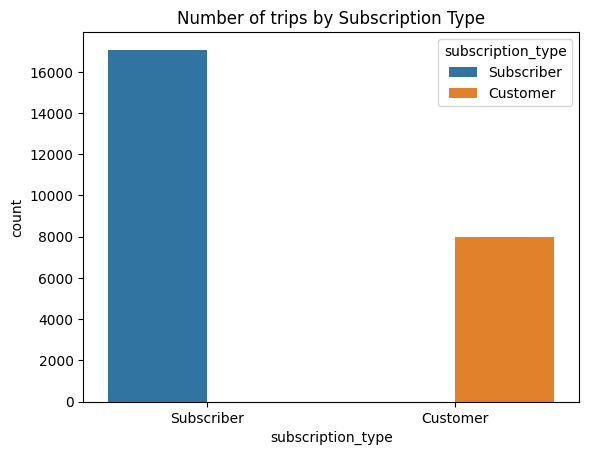

In [18]:
sns.countplot(x = trip_summarised['subscription_type'],hue = trip_summarised['subscription_type']).set(title = "Number of trips by Subscription Type")
plt.show()

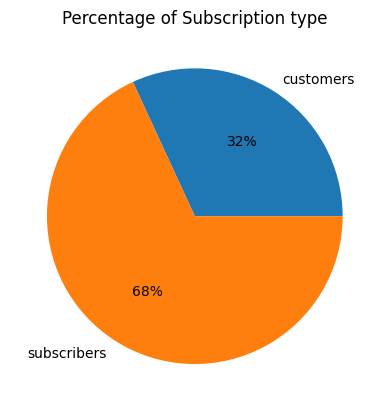

In [19]:
# pie chart of subscription_type
# Subcriber and Customer
#print((trip_summarised['subscription_type'] == "Subscriber").count())
customer_num = (trip_summarised[trip_summarised['subscription_type'] == "Customer"]['tripID']).count()
subscriber_num = (trip_summarised[trip_summarised['subscription_type'] == "Subscriber"]['tripID']).count()

plt.pie(np.array([customer_num,subscriber_num]), labels = ["customers",'subscribers'],autopct='%.0f%%')
plt.title("Percentage of Subscription type")
plt.show()

***Kết luận:***
Vì vậy, bây giờ, chúng tôi có thể trả lời vấn đề 1 ngay từ đầu.
*Loại đăng ký thực hiện hầu hết chuyến đi trong dịch vụ của chúng tôi là **Subscriber** với 79% chuyến đi*

### ***Bây giờ chúng ta hãy xem số lượng chuyến đi tùy thuộc vào Thành phố***
#### Thành phố xuất phát

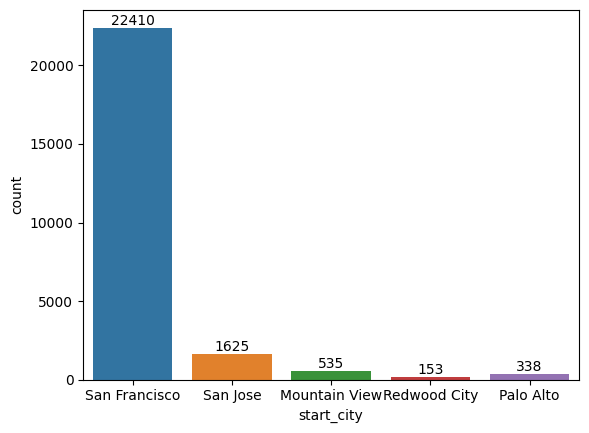

In [20]:
ax = sns.countplot(x=trip_summarised["start_city"])
for label in ax.containers:
    ax.bar_label(label)
plt.show()

#### Thành phố kết thúc

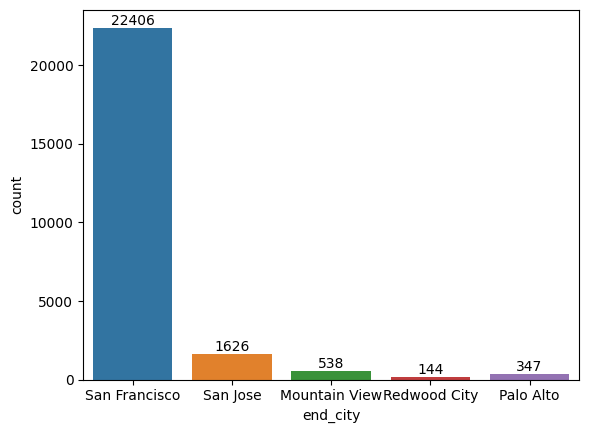

In [21]:
ax = sns.countplot(x=trip_summarised["end_city"])
for label in ax.containers:
    ax.bar_label(label)
plt.show()

Chúng ta có thể thấy số lượng chuyến đi ở 'start_city' và 'end_city' không giống nhau.
Vì vậy, chúng tôi biết rằng mọi người cũng lấy xe của chúng tôi đến một thành phố khác. Dữ liệu dưới đây sẽ cho chúng ta thấy về điều này:

Total of trip: 25060
Total of trip go to the same city: 25008
Total of trip go to different city: 52


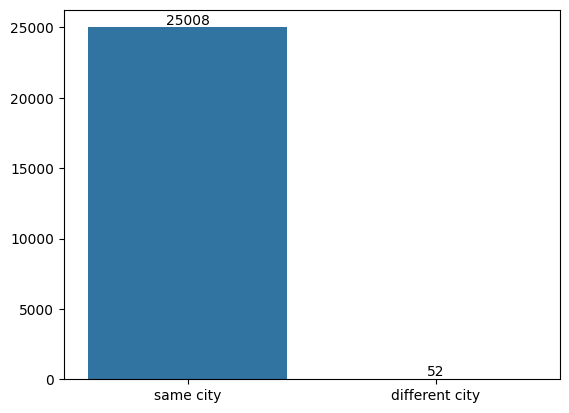

In [22]:
num_of_trip = trip_summarised['tripID'].count()
num_of_trip_to_diffrent_city =trip_summarised[trip_summarised['start_city'] != trip_summarised['end_city']]['tripID'].count()
print("Total of trip: {}".format(num_of_trip))
print("Total of trip go to the same city: {}".format(num_of_trip-num_of_trip_to_diffrent_city))
print("Total of trip go to different city: {}".format(num_of_trip_to_diffrent_city))
new_dict = {}
new_dict['same city'] = num_of_trip-num_of_trip_to_diffrent_city
new_dict['different city'] = num_of_trip_to_diffrent_city
ax = sns.barplot(x=list(new_dict.keys()), y = list(new_dict.values()))
for i in ax.containers:
    ax.bar_label(i,)

## Dịch vụ chia sẻ xe vùng Vịnh được sử dụng ở đâu?

Chúng tôi tự hỏi mọi người sử dụng dịch vụ của chúng tôi nhiều nhất ở đâu? Vì vậy, hãy xem biểu đồ dưới đây để tìm ra nó. Biểu đồ bên dưới hiển thị số lượng người sử dụng dịch vụ xe máy của chúng tôi tại các địa điểm xuất phát. Vì người thuê xe tham gia tour ít khi chạy sang thành phố khác nên chúng ta chỉ cần xét đến vị trí xuất phát.

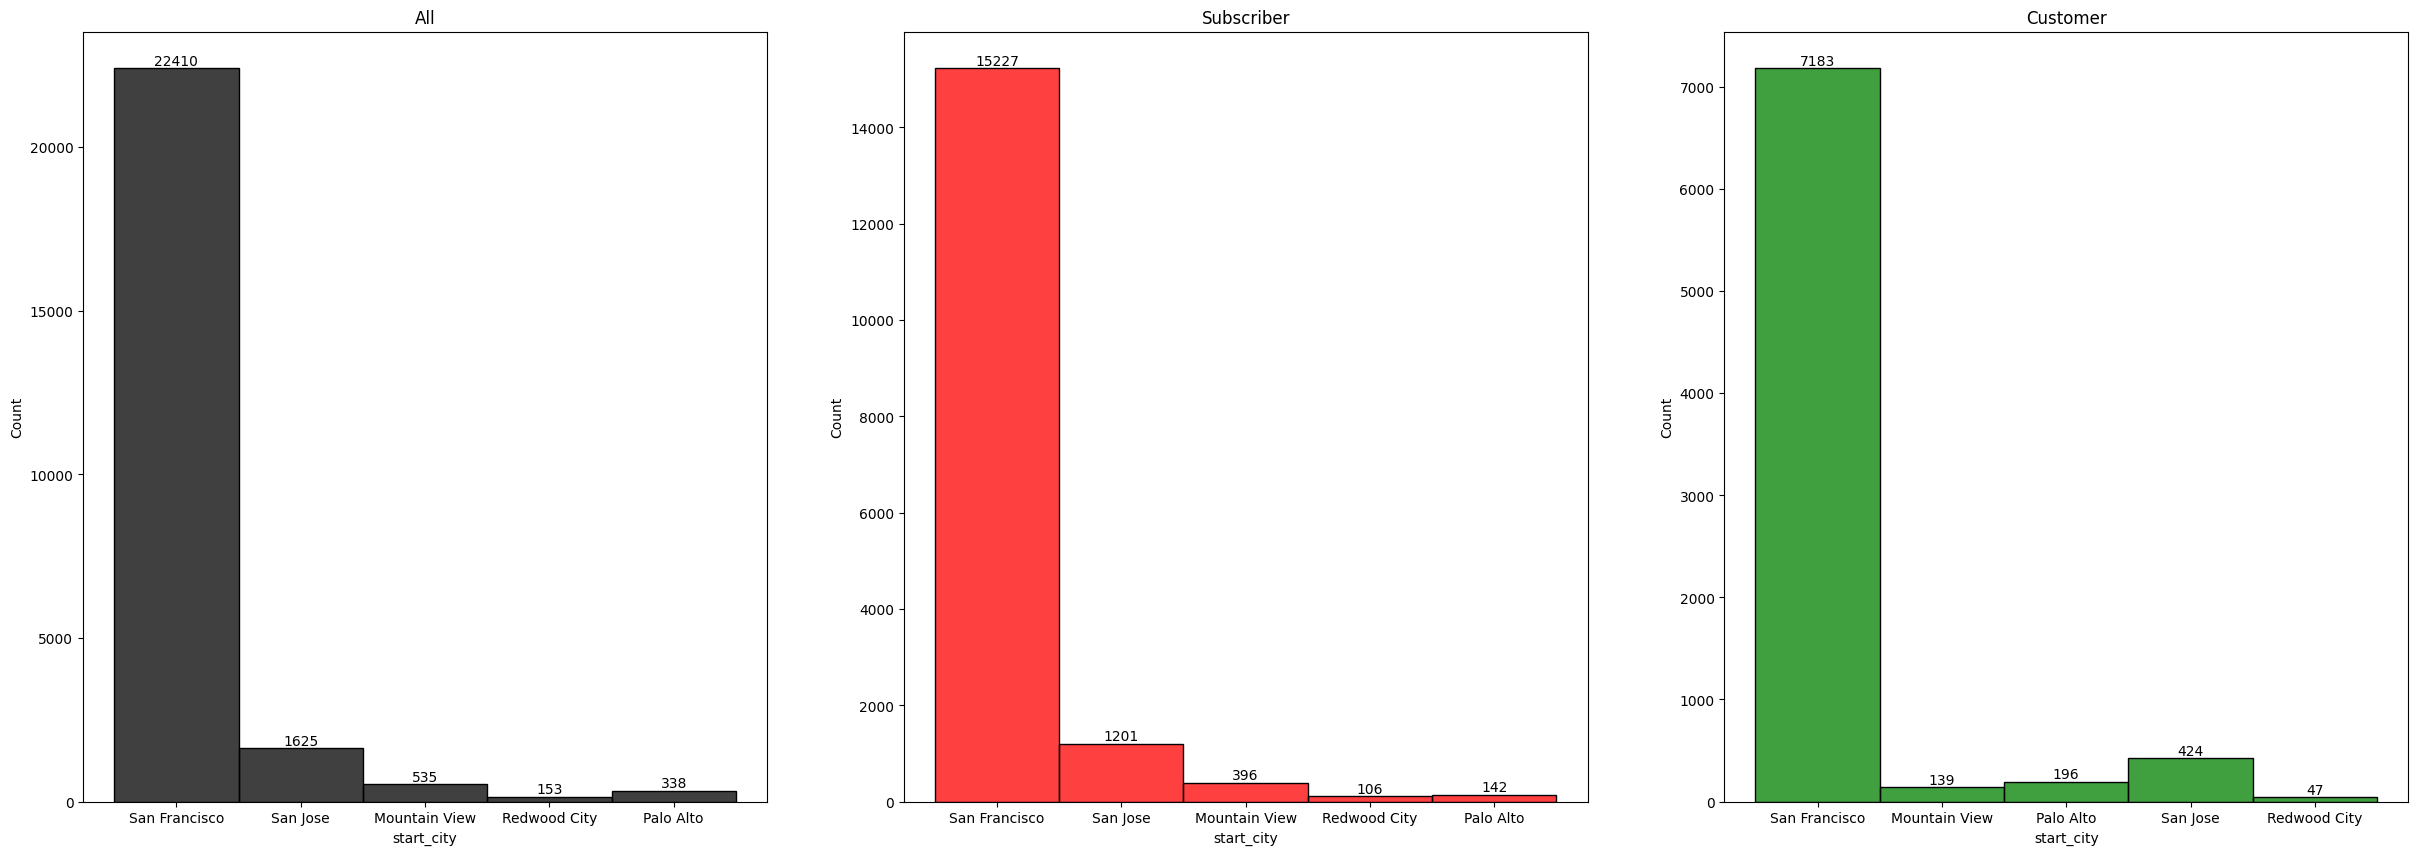

In [23]:
fig, axes = plt.subplots(1,3, figsize = (30,10))

ax = sns.histplot(ax = axes[0],data = trip_summarised, x="start_city", multiple="stack",color = 'black')
axes[0].set_title("All")
for label in ax.containers:
    ax.bar_label(label)
ax = sns.histplot(ax = axes[1],data = trip_summarised.where(trip_summarised['subscription_type'] == "Subscriber"), x="start_city", multiple="stack", color = 'r')
axes[1].set_title("Subscriber")

for label in ax.containers:
    ax.bar_label(label)
ax =sns.histplot(ax = axes[2],data = trip_summarised.where(trip_summarised['subscription_type'] == "Customer"), x="start_city", multiple="stack",color = 'g')
axes[2].set_title("Customer")

for label in ax.containers:
    ax.bar_label(label)
plt.show()

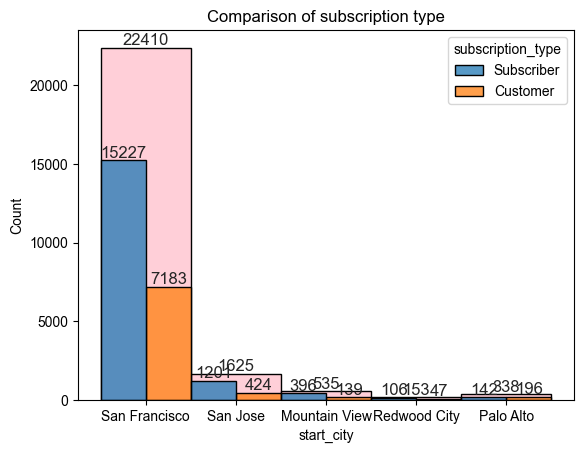

In [24]:
ax= sns.histplot(data = trip_summarised, x="start_city", color = "pink")
sns.histplot(data = trip_summarised, x="start_city", multiple="dodge", hue = 'subscription_type').set_title("Comparison of subscription type")

sns.set(rc = {'figure.figsize':(20,10)})
for label in ax.containers:
    ax.bar_label(label)


plt.show()

# Khi nào sử dụng dịch vụ chia sẻ xe tại Bay Area?

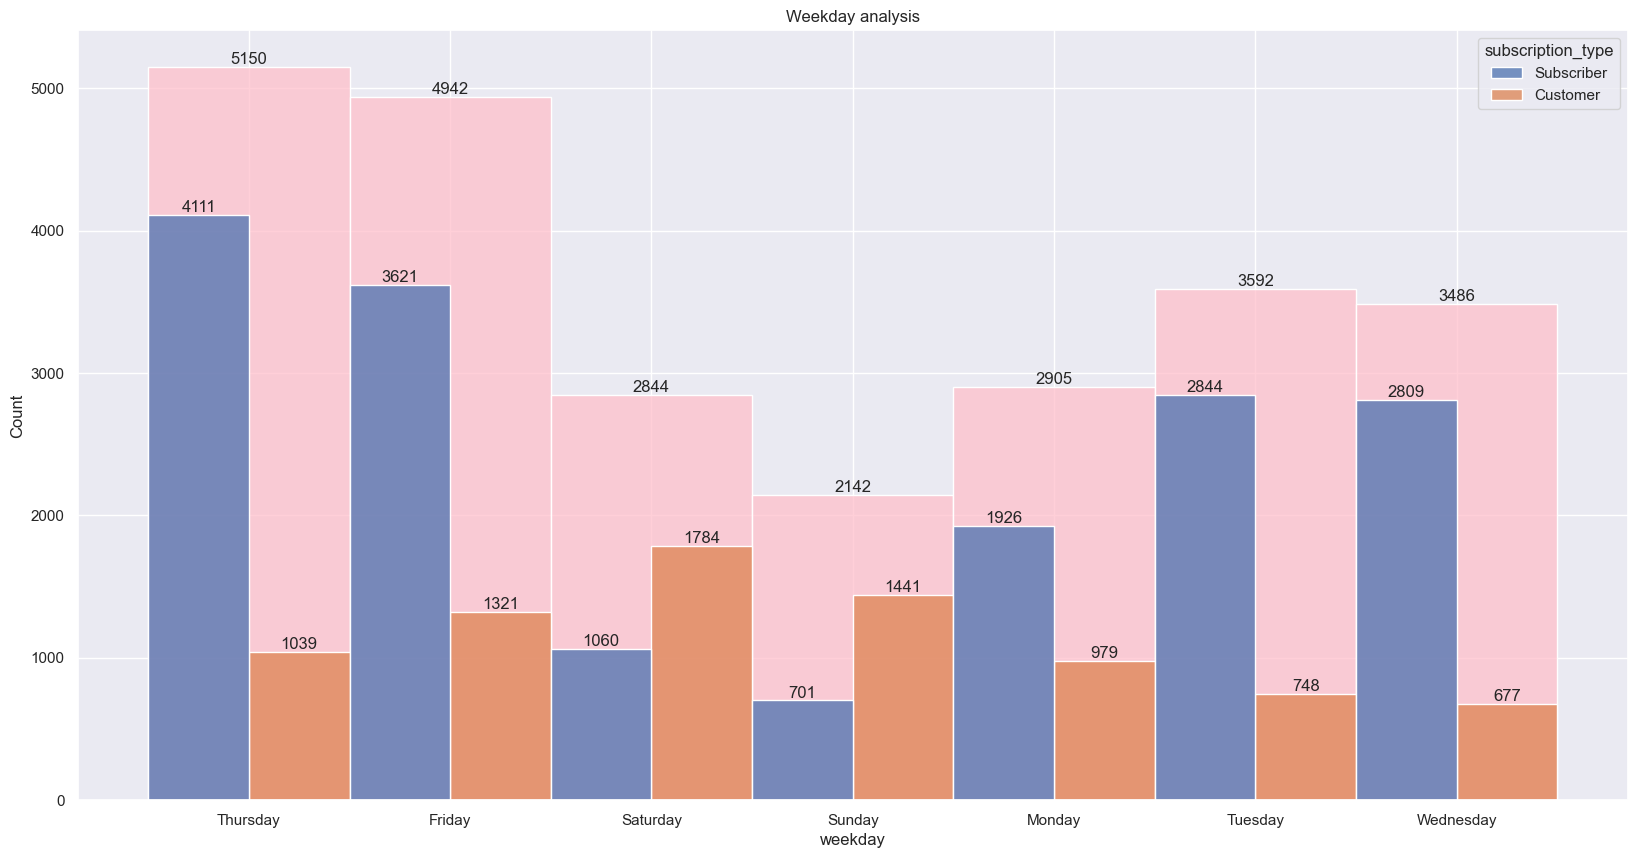

In [25]:
sns.histplot(data = trip_summarised, x="weekday", multiple="dodge",color="pink").set_title("Weekday analysis")
ax = sns.histplot(data = trip_summarised, x="weekday", multiple="dodge", hue = 'subscription_type')
for label in ax.containers:
    ax.bar_label(label)
plt.show()


***Có thể thấy, người dân có xu hướng sử dụng dịch vụ xe máy vào các ngày trong tuần thay vì cuối tuần. Theo biểu đồ dữ liệu hàng tuần, mức cao nhất là vào Thứ Năm và thấp nhất là vào Chủ Nhật. Những người đi xe trong tuần chiếm phần lớn là những người đăng ký và lượng hành khách trong số những người đăng ký rơi vào cuối tuần nên số chuyến đi của khách hàng chỉ có thể đông hơn họ.***

{'Monday': 2905, 'Tuesday': 3592, 'Wednesday': 3485, 'Thursday': 5150, 'Friday': 4942, 'Saturday': 2844, 'Sunday': 2142}


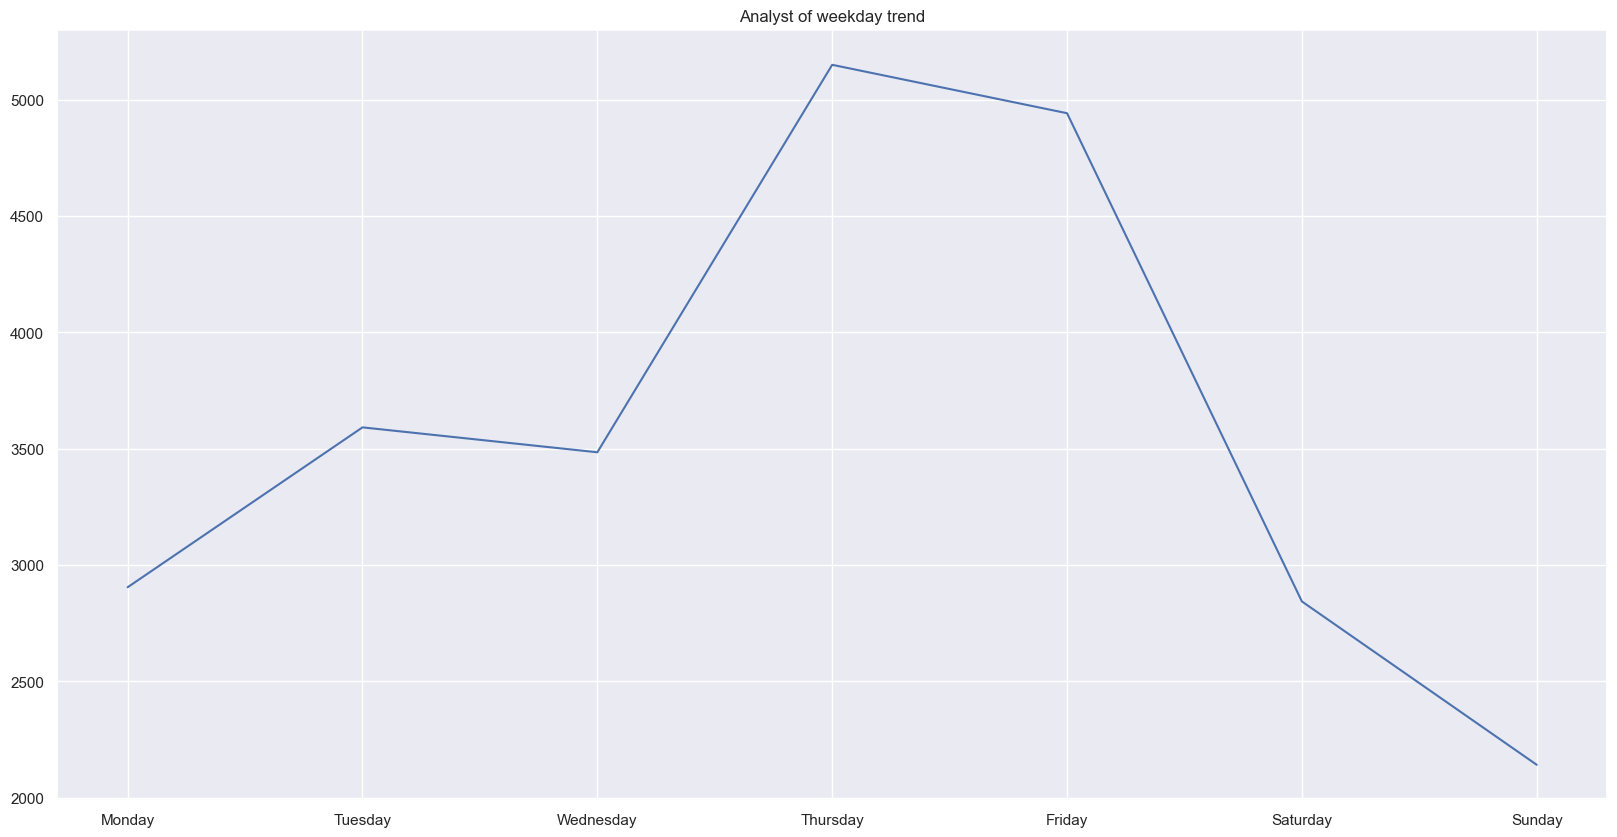

In [26]:
weekdays = ["Monday",
"Tuesday",
"Wednesday",
"Thursday",
"Friday",
"Saturday",
"Sunday"]
weekday_data = {}
for weekday in weekdays:
    weekday_data[weekday] = trip_summarised['tripID'].where(trip_summarised['weekday'] == weekday).count()
print(weekday_data)
sns.lineplot(data = weekday_data).set(title = "Analyst of weekday trend")
plt.show()

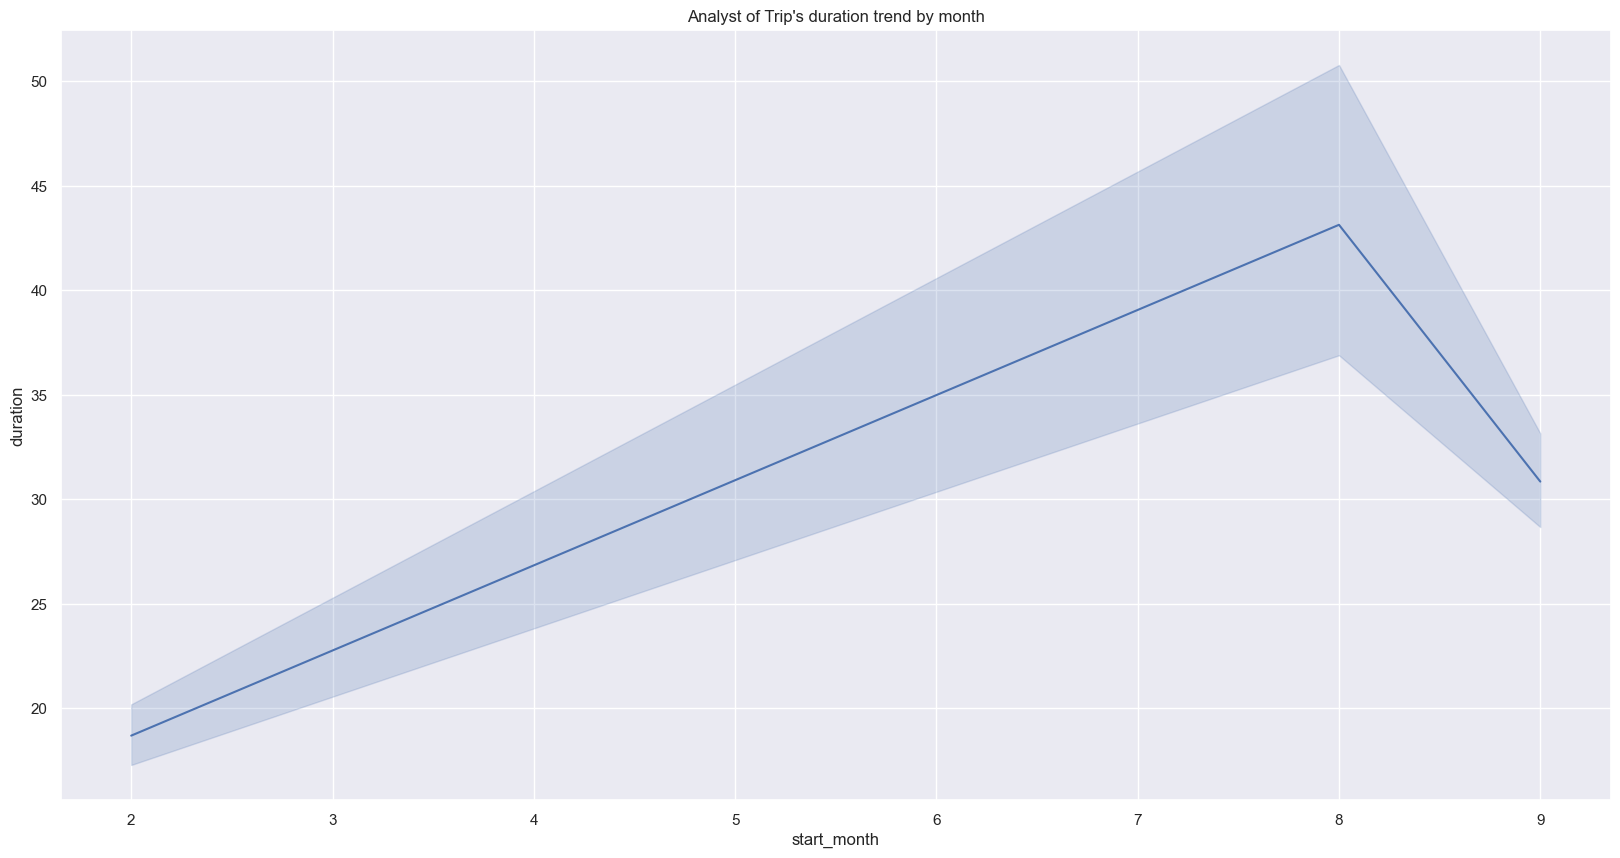

In [27]:
sns.lineplot(data = trip_summarised, x = 'start_month',y =  'duration').set(title = "Analyst of Trip's duration trend by month")
plt.show() 

In [28]:
trip_summarised['duration']

0           1.050000
1           1.166667
2           1.183333
3           1.283333
4           1.383333
            ...     
25056       6.416667
25057       2.416667
25058      11.283333
25059    1068.800000
25060       9.500000
Name: duration, Length: 25061, dtype: float64

[Text(0.5, 1.0, "Analyst of Trip's duration trend by weekday")]

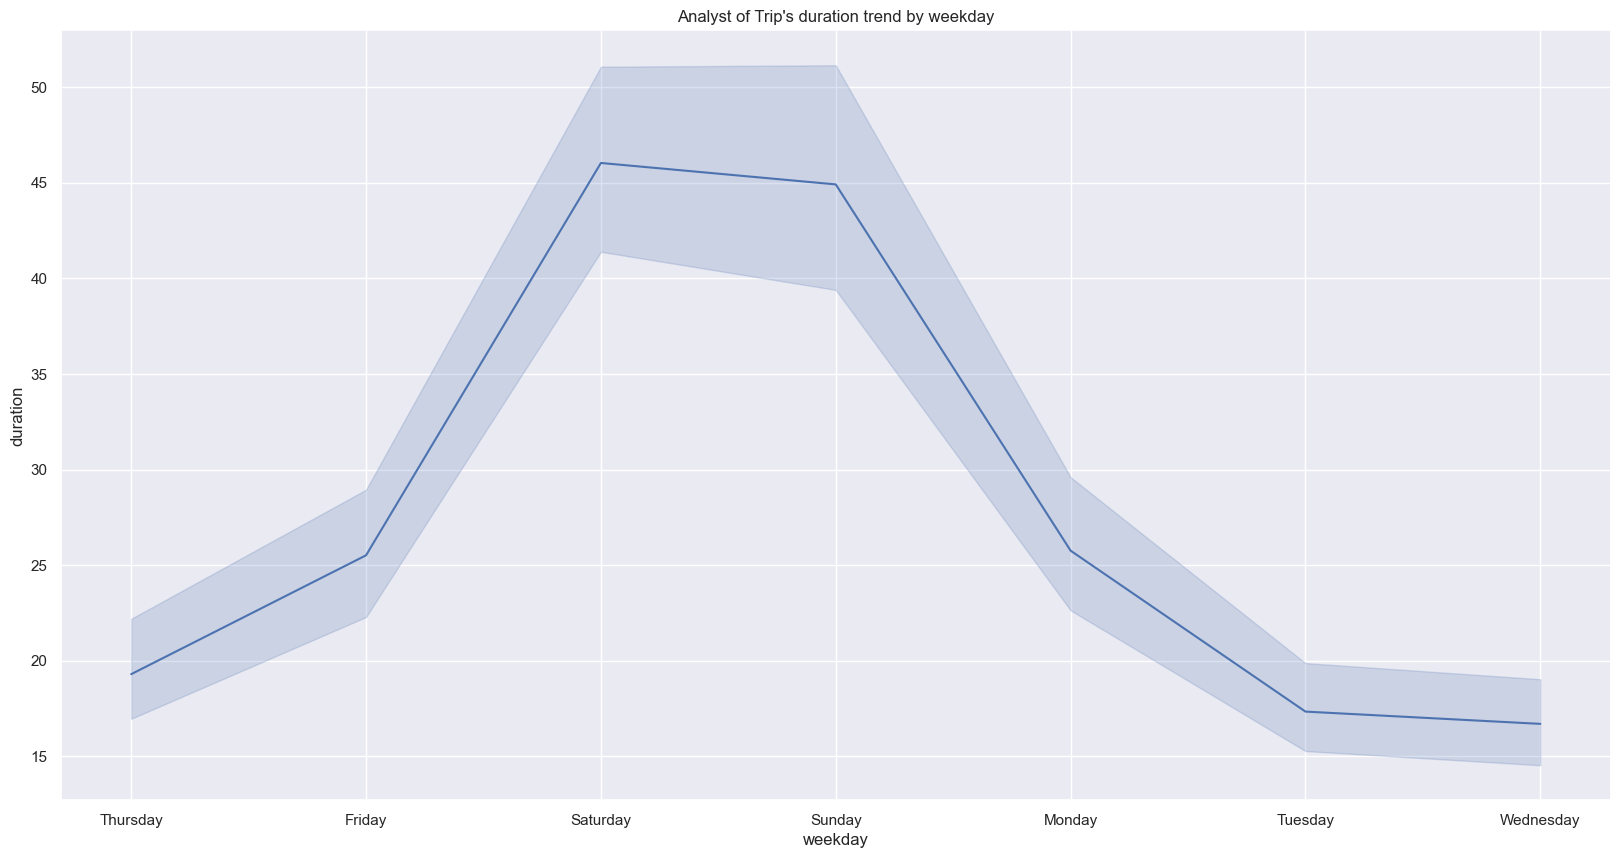

In [29]:
sns.lineplot(data = trip_summarised, x = 'weekday',y =  'duration').set(title = "Analyst of Trip's duration trend by weekday")

Chúng ta có thể nhìn thấy. Dù lượng khách vào cuối tuần rất ít nhưng thời gian vui chơi vào những ngày này lại tăng lên đáng kể so với ngày thường. Cao nhất là thứ bảy và thấp nhất là thứ tư.

# Kết luận

Ở đây chúng tôi thấy rằng Bike Share được sử dụng chủ yếu ở San Francisco, vào Thứ Năm và Tháng Tám.

Mức độ phổ biến của từng đài đối với người đăng ký so với khách hàng là một khía cạnh chưa được xem xét trong phân tích này. Chúng tôi có thể xác định những trạm nào có nhu cầu cao hơn đối với người đi làm hoặc khách du lịch và có lẽ liệu các khu vực trong thành phố có cần thêm trạm hay không dựa trên những gì chúng tôi quan sát được về hành vi của khách hàng so với hành vi của người đăng ký.

Mọi vấn đề chúng tôi muốn biết đều được giải quyết:

- Vấn đề 1: Tìm hiểu ***Loại đăng ký*** nào được nhiều người sử dụng dịch vụ của chúng tôi nhất.
    
     Loại thuê bao sử dụng nhiều dịch vụ nhất là: Thuê bao
    
- Vấn đề 2: Thăm dò, thống kê thời lượng chuyến đi.
    
     ``` đánh dấu
     Thời gian trung bình của chuyến đi là 20,515169 phút.
    
     - Thời gian trung bình của chuyến đi là 8,85 phút.
    
     - Hầu hết mọi người thực hiện một chuyến đi trong 6,05 phút.
    
     - Không có mối quan hệ giữa 2 giá trị: thời gian và số lượng chuyến đi vì
     chuyến đi có thể đạt tối đa vào giữa tuần nhưng thời gian trung bình dài nhất là vào cuối tuần.
     ```
    
- Vấn đề 3: Phân tích ***Loại thuê bao các ngày trong tuần***
- Vấn đề 4: Vẽ đồ thị mô tả xu hướng lượng khách du lịch qua các ngày trong tuần. Ngày nào chúng ta có nhiều khách nhất?